# CSE 343 Machine Learning A-1

## Q1 Linear Regression

### Preprocessing and EDA

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

df = pd.read_csv("abalone.data", names = ["sex","length","diameter","height","whole height","shucked weight","viscera weight","shell weight","rings"])

## change genders to integers for better use in model
def to_num(s):
    
    if s=='I':
        return 0
    if s=='M':
        return 1
    return 2

df["sex"]=df["sex"].apply(to_num)
df

,sex,length,diameter,height,whole height,shucked weight,viscera weight,shell weight,rings
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,2,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,1,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,1,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,2,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


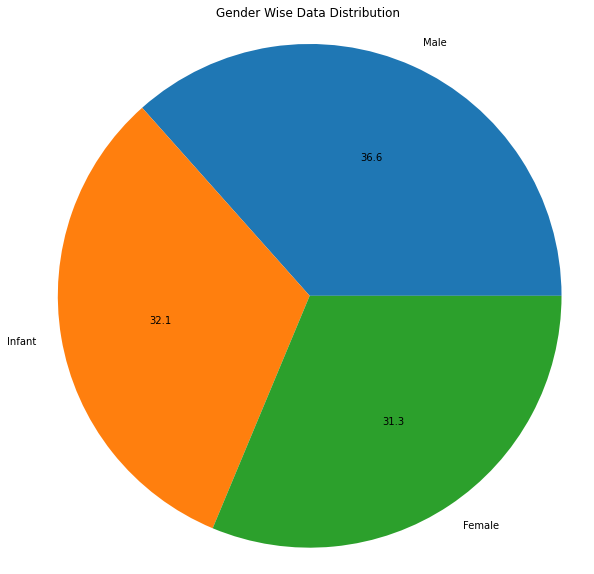

In [32]:
plt.pie(df["sex"].value_counts().values,labels=["Male","Infant","Female"],autopct="%.1f")
plt.axis("equal")
plt.title("Gender Wise Data Distribution")
plt.show()

Text(0.5, 1.0, 'rings Distribution')

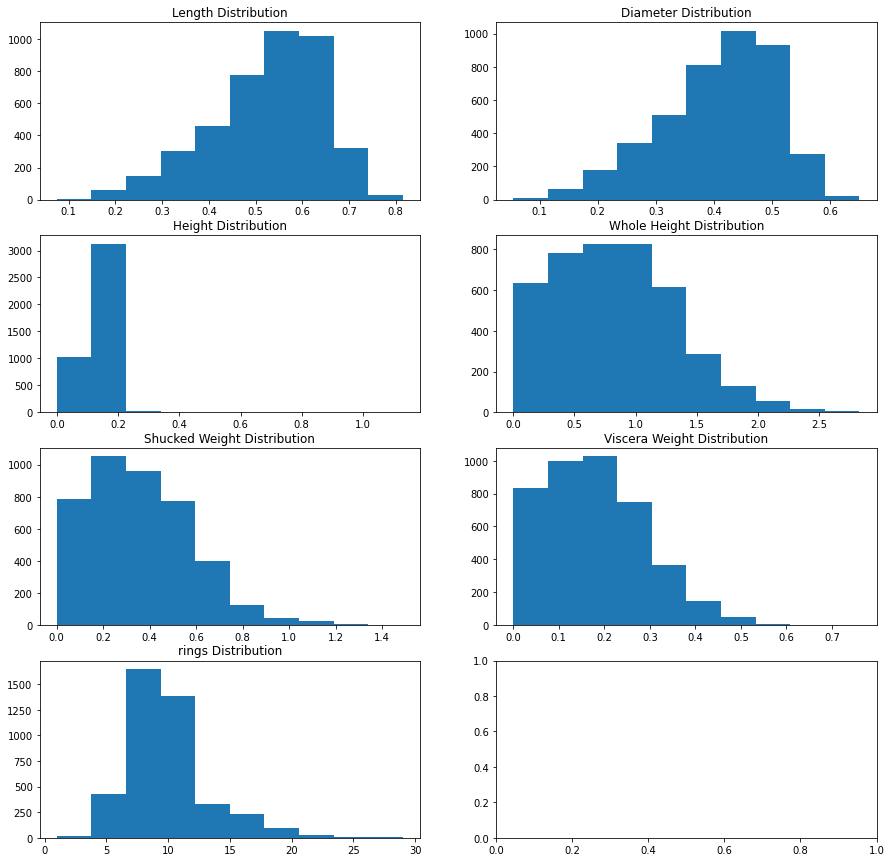

In [33]:
## creating plots for different columns

plt.rcParams["figure.figsize"] = (15,15)
fig,axs = plt.subplots(4,2)

axs[0,0].hist(df["length"])
axs[0,0].set_title("Length Distribution")

axs[0,1].hist(df["diameter"])
axs[0,1].set_title("Diameter Distribution")

axs[1,0].hist(df["height"])
axs[1,0].set_title("Height Distribution")

axs[1,1].hist(df["whole height"])
axs[1,1].set_title("Whole Height Distribution")

axs[2,0].hist(df["shucked weight"])
axs[2,0].set_title("Shucked Weight Distribution")

axs[2,1].hist(df["viscera weight"])
axs[2,1].set_title("Viscera Weight Distribution")

axs[3,0].hist(df["rings"])
axs[3,0].set_title("rings Distribution")


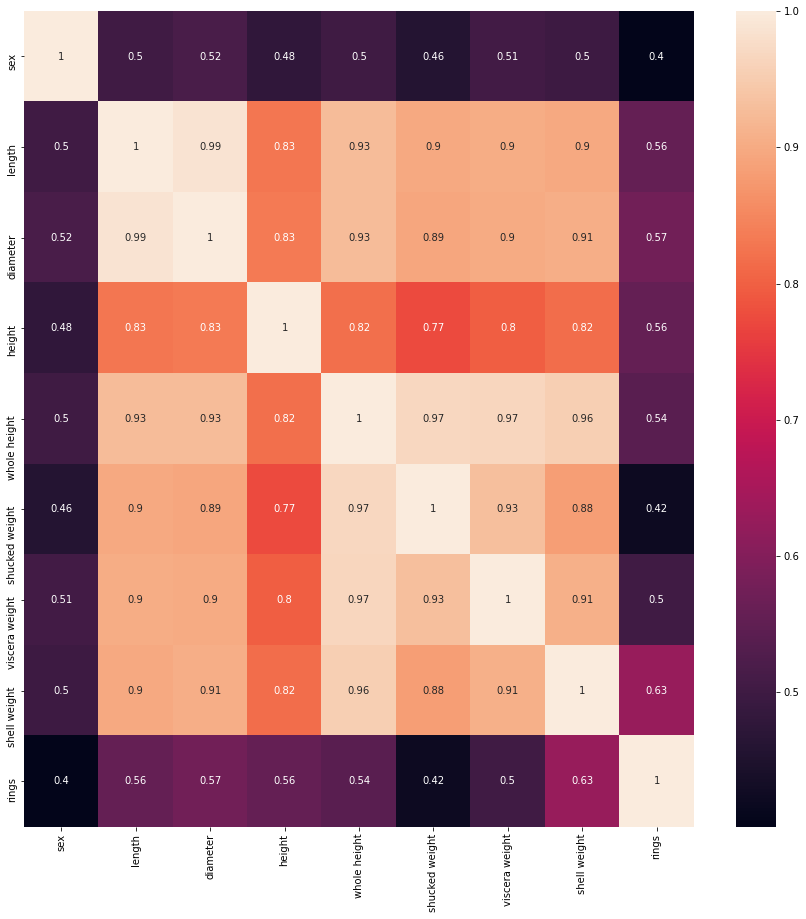

In [34]:
## creating correlation matrix for the dataset
ax = sns.heatmap(df.corr(), annot=True)

### 1.1 Self Implemented Linear Regression

In [35]:
## y - m x 1
## x - m x n+1
## m - n+1 x 1

## function to calculate RMSE
def RMSE(y, y_pred):
    
    return np.sqrt(np.sum(np.square(y-y_pred))/y.shape[0])

## class which implements Linear Regression - create an object of the class
## and use its functions to apply LR on the data

class LinearRegression:
    
    ## class members to be given as input in the constructor by the user
    coeff_matrix=None
    alpha=None
    num_iterations=None
    num_features=None
    num_training_points=None
    
    def __init__(self, alpha, num_iterations, num_features, num_training_points):
        
        ## num features incl constt value by appending a column of 1's
        coeff=[0 for i in range(num_features)]
        coeff[num_features-1]=0
        
        self.coeff_matrix=np.array(coeff)
        
        self.alpha=alpha
        self.num_iterations=num_iterations
        self.num_features=num_features
        self.num_training_points=num_training_points
        
    ## function to run 1 iteration of gradient descent
    ## note that this is batch gradient descent so updation
    ## is done once for entire training set
    def step_gd(self, x, y):
            
        ## dummy array to store slopes
        slope_arr = np.zeros(self.num_features)
        
        for i in range(self.num_training_points):
            
            X = x[i]
            Y = y[i]
            
            for j in range(self.num_features):
                
                ## adding loss for current feature (calculated by finding derivative of cost)
                slope_arr[j] += (-2/self.num_training_points)*(Y-(X*self.coeff_matrix).sum())*X[j]
                
        self.coeff_matrix = self.coeff_matrix - self.alpha*slope_arr
        
    ## function to return cost of current x and y data
    def cost(self, x, y):
        return np.sqrt(np.sum(np.square(y-np.matmul(x, self.coeff_matrix)))/x.shape)[0]
    
    ## function called by user to run linear regression, this calls
    ## step_gd function for a specified number of times
    def run_gd(self, x, y):
        
        for i in range(self.num_iterations):
            self.step_gd(x,y)
            if (i+1)%20==0:
                print("iteration:",i+1,":",self.cost(x, y))
           
    ## function to be used on testing data to predict values
    def predict(self, x):
        
        return np.matmul(x,self.coeff_matrix)

In [36]:
from random import randrange, seed

def train_test_split(x,y,test_size):
    
    x_train = []
    y_train = []
    x_test = []
    y_test = []
    
    num_samples = len(x)
    train_size = int((1-test_size)*num_samples)
    
    for i in range(train_size):
        idx = randrange(len(x))
        x_train.append(x[idx])
        y_train.append(y[idx])
        
        x=np.delete(x,idx,0)
        y=np.delete(y,idx,0)
        
    test_size = len(x)
    for i in range(test_size):
        x_test.append(x[i])
        y_test.append(y[i])
        
    return np.array(x_train), np.array(x_test), np.array(y_train), np.array(y_test)

seed(0)

In [37]:
## creating x and y from the datasets and splitting using train_test_split

x = df.iloc[:,:-1].to_numpy()
x = np.c_[x,np.ones(x.shape[0])]
y = df.iloc[:,-1].to_numpy()

x_train, x_test, y_train, y_test = train_test_split(x,y,0.2)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((3341, 9), (836, 9), (3341,), (836,))

In [38]:
## calling linear regression on the training data

learning_rate=0.25 ## checked manually, this gives most accurate convergence in 200 iterations
num_iterations=200
num_features=x_train.shape[1]
num_training_points=x_train.shape[0]

lin_reg_model = LinearRegression(learning_rate,num_iterations,num_features,num_training_points)
lin_reg_model.run_gd(x_train,y_train)

iteration: 20 : 3.057120678044744
iteration: 40 : 2.580588683951254
iteration: 60 : 2.5440021374563893
iteration: 80 : 2.521929249233005
iteration: 100 : 2.5015530358665177
iteration: 120 : 2.4824468139473885
iteration: 140 : 2.464529537090189
iteration: 160 : 2.4477329091731845
iteration: 180 : 2.4319920514650897
iteration: 200 : 2.4172451727745097


In [24]:
## reporting RMSE on train and test data

y_train_pred = lin_reg_model.predict(x_train)
y_test_pred = lin_reg_model.predict(x_test)
print("RMSE train:",RMSE(y_train,y_train_pred))
print("RMSE test:",RMSE(y_test,y_test_pred))

RMSE train: 2.4407432511343474
RMSE test: 2.4166977894032393


### 1.2 Plotting graphs using inbuilt Linear Regression

In [25]:
## 1.2(a)

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

## candidate alpha values
alphas = [1e-5,5e-5,1e-4,5e-4,1e-3,5e-3,1e-2,5e-2,1e-1,5e-1,1]

ridge_RMSE = []
lasso_RMSE = []

## calling both models for different alpha values
for alpha in alphas:
    
    ridge = Ridge(alpha=alpha)
    lasso = Lasso(alpha=alpha)
    
    ridge.fit(x_train, y_train)
    lasso.fit(x_train, y_train)
    
    y_pred_ridge = ridge.predict(x_test)
    y_pred_lasso = lasso.predict(x_test)
    
    ridge_RMSE.append(RMSE(y_test, y_pred_ridge))
    lasso_RMSE.append(RMSE(y_test, y_pred_lasso))

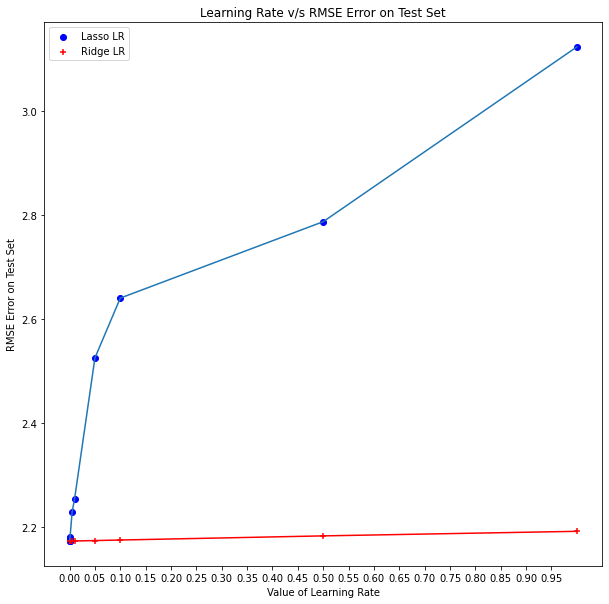

In [26]:
## plots
plt.rcParams["figure.figsize"] = (10,10)
plt.scatter(alphas,lasso_RMSE,c="b",marker="o", label="Lasso LR")
plt.scatter(alphas,ridge_RMSE,c="r",marker="+", label="Ridge LR")
plt.plot(alphas,lasso_RMSE)
plt.plot(alphas,ridge_RMSE,c="r")
plt.xticks(np.arange(start=0,stop=1,step=0.05))
plt.ylabel("RMSE Error on Test Set")
plt.xlabel("Value of Learning Rate")
plt.legend()
plt.title("Learning Rate v/s RMSE Error on Test Set")
plt.show()

#### Best Model Coefficients

On observation by eye, the best alpha values are as follows - 

1. For Ridge LR = 0.05 or 0.5 (although all values are very close and differ in hundredths of place)
2. For Lasso LR = 0.0001 or 0.001 (1e-5, 1e-4, 1e-3 are all very close to zero and have nearly the same error)

Above values are observation by eye, for more clarity, we do grid search in the next part to verify our claims

#### Note:
From theoretical knowledge we know that Learning Rate is directly proportional to loss. A very less learning rate will give us a very less loss, the only catch here is that as learning rate reduces, the time (or iterations) taken to converge will increase substantially, therefore, for practical applications we take a learning rate which has reasonable error and takes reasonable time to run. Theoretically, smaller value of learning rate is the best to minimise loss but more practical values are written above

In [42]:
## 1.2 (b)

from sklearn.model_selection import GridSearchCV

ridge = Ridge(max_iter=100000)
lasso = Lasso(max_iter=100000)

grid1 = GridSearchCV(estimator=ridge, param_grid=dict(alpha=alphas))
grid2 = GridSearchCV(estimator=lasso, param_grid=dict(alpha=alphas))

grid1.fit(x_train, y_train)
grid2.fit(x_train, y_train)

print("Best alpha value for Ridge LR:",grid1.best_estimator_.alpha)
print("Best alpha value for Lasso LR:",grid2.best_estimator_.alpha)
print()
print("Ridge Regression model coefficients:")
ridge = Ridge(alpha=0.5)
ridge.fit(x_train,y_train)
print(ridge.coef_)
print("Lasso Regression model coefficients:")
lass=Lasso(alpha=0.001)
lasso.fit(x_train,y_train)
print(lasso.coef_)
print("Self Implemented model coefficeints:")
print(lin_reg_model.coeff_matrix)

Best alpha value for Ridge LR: 0.5
Best alpha value for Lasso LR: 0.001

Ridge Regression model coefficients:
[  0.34996087   2.23425656   8.0648696    8.4862047    7.92621112
 -18.15111758  -8.73940904   9.5098849    0.        ]
Lasso Regression model coefficients:
[0.01396169 0.         0.         0.         0.         0.
 0.         0.         0.        ]
Self Implemented model coefficeints:
[ 0.52995808  3.13446505  2.89332357  1.6309801   2.59116313 -4.65847809
 -0.19015229  4.50163776  4.8445348 ]


#### Comparison with previous part

Both values are very close to what was predicted in previous part from the graph. Grid search gives more practical learning rates which also take into account the rate of convergence. Also the value of model coefficients is very different for all the 3 models.